In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

In [2]:
import pandas as pd

In [7]:
tabs = pd.read_html('https://nssdc.gsfc.nasa.gov/planetary/factsheet/', header=0, index_col=0)
df_planets = tabs[0]

In [8]:
df_planets.drop('MOON', axis=1, inplace=True)
df_planets

,MERCURY,VENUS,EARTH,MARS,JUPITER,SATURN,URANUS,NEPTUNE,PLUTO
Mass (1024kg),0.330,4.87,5.97,0.642,1898,568,86.8,102,0.0146
Diameter (km),4879,12104,12756,6792,142984,120536,51118,49528,2370
Density (kg/m3),5427,5243,5514,3933,1326,687,1271,1638,2095
Gravity (m/s2),3.7,8.9,9.8,3.7,23.1,9.0,8.7,11.0,0.7
Escape Velocity (km/s),4.3,10.4,11.2,5.0,59.5,35.5,21.3,23.5,1.3
Rotation Period (hours),1407.6,-5832.5,23.9,24.6,9.9,10.7,-17.2,16.1,-153.3
Length of Day (hours),4222.6,2802.0,24.0,24.7,9.9,10.7,17.2,16.1,153.3
Distance from Sun (106 km),57.9,108.2,149.6,227.9,778.6,1433.5,2872.5,4495.1,5906.4
Perihelion (106 km),46.0,107.5,147.1,206.6,740.5,1352.6,2741.3,4444.5,4436.8
Aphelion (106 km),69.8,108.9,152.1,249.2,816.6,1514.5,3003.6,4545.7,7375.9


In [9]:
df_planets.dtypes

MERCURY    object
VENUS      object
EARTH      object
MARS       object
JUPITER    object
SATURN     object
URANUS     object
NEPTUNE    object
PLUTO      object
dtype: object

In [10]:
r_j = float(df_planets.loc['Diameter (km)', 'JUPITER'])/2.0 
r_e = float(df_planets.loc['Diameter (km)', 'EARTH'])/2.0
print r_j, r_e

# Jupiter bulges, so its mean radius is actually smaller
print 69911**3 / 6371.0**3
print 1321*0.75

71492.0 6378.0
1321.33739961
990.75


In [11]:
df_planets.loc['Diameter (km)', :]

MERCURY      4879
VENUS       12104
EARTH       12756
MARS         6792
JUPITER    142984
SATURN     120536
URANUS      51118
NEPTUNE     49528
PLUTO        2370
Name: Diameter (km), dtype: object

In [18]:
# moon = 3475
diams = [4879,12104,12756,6792,142984,120536,51118,49528,2370]
n_moons = [0,0,1,2,79,62,27,14,5]
temps = [167,464,15,-65,-110,-140,-195,-200,-225]
len_data = [4222.6,2802.0,24.0,24.7,9.9,10.7,17.2,16.1,153.3]
planets = zip(diams, n_moons, temps, len_data)


In [19]:
for ob in df_planets.loc['Distance from Sun (106 km)', :].iteritems():
    print ob

(u'MERCURY', '57.9')
(u'VENUS', '108.2')
(u'EARTH', '149.6')
(u'MARS', '227.9')
(u'JUPITER', '778.6')
(u'SATURN', '1433.5')
(u'URANUS', '2872.5')
(u'NEPTUNE', '4495.1')
(u'PLUTO', '5906.4')


(-20.0, 6000.0, -20.0, 20.0)

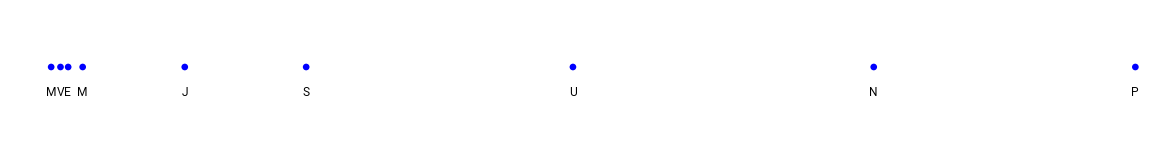

In [17]:
fig, ax = plt.subplots(figsize=(20,2))


dpatches = []

for name, d in df_planets.loc['Distance from Sun (106 km)', :].iteritems():
    circle = mpatches.Circle((d, 0.0), 18.0 )
    plt.text(d, -150.0, u"{:}".format(name[0]), ha="center", family='Roboto', size=12)
    dpatches.append(circle)
    
# cmap=plt.cm.hsv,
dcollection = PatchCollection(dpatches, alpha=1, edgecolor="none")
ax.add_collection(dcollection)
ax.set_xlim(left=0.0)

plt.axis('equal')
plt.xlim(left=-20.0)
plt.axis('off')
#plt.tight_layout()
#plt.savefig("dplanets.svg")


(-80000.0, 80000.0, 0.0, 500000.0)

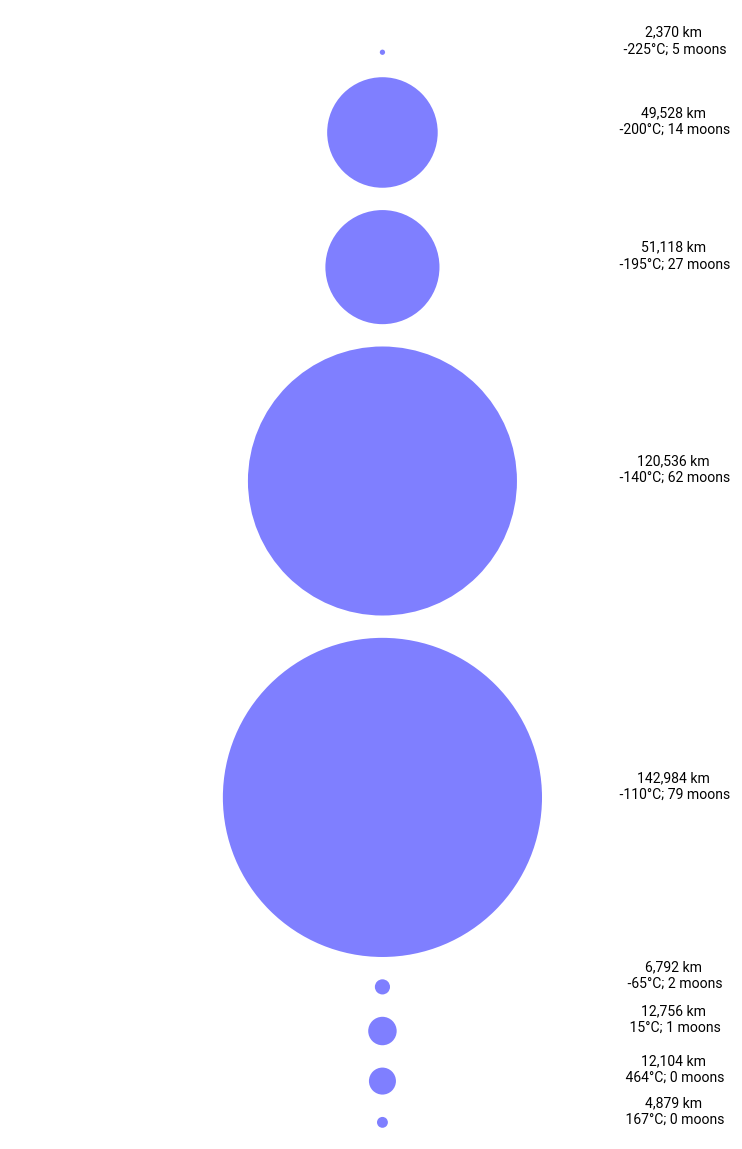

In [22]:

fig, ax = plt.subplots(figsize=(12,20))

patches = []
last_offset = 0.0
for p, n, t, l in planets:
    y = last_offset + p/2.0
    circle = mpatches.Circle((0.0, y), p / 2.0 )
    plt.text(130000.0, y, u"{:,} km\n {:}°C; {} moons".format(p, t, n), ha="center", family='Roboto', size=14)
    patches.append(circle)
    last_offset = last_offset + p + 10000.0

# cmap=plt.cm.hsv,
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.5, edgecolor="none")
ax.add_collection(collection)

plt.axis('equal')
plt.axis('off')
#plt.savefig("planets.svg")